<span>
<img align="right" width="320" src="http://www.sobigdata.eu/sites/default/files/SoBigData_RI_3.png">
</span>
<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.9<br/>
<b>Last update:</b> 07/09/2023
</span>

<a id='top'></a>
# *Mixing R and Python*
This notebook contains an introduction to rpy2, a Python package that allows a basilar integration of R and Python.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started.

## Table of Contents
1. [R in a Python Notebook](#R) 
2. [Variable passing](#var) 
    1. [Push: from Python to R](#i)
    2. [Pull: from R to Python](#o)

In [1]:
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

In [2]:
# Loading the %%R magic 
%load_ext rpy2.ipython

<a id='R'></a>
## 1. R in a Python Notebook ([to top](#top))

To execute a R script, it is mandatory to specify that the selected cell does not contain Python code.

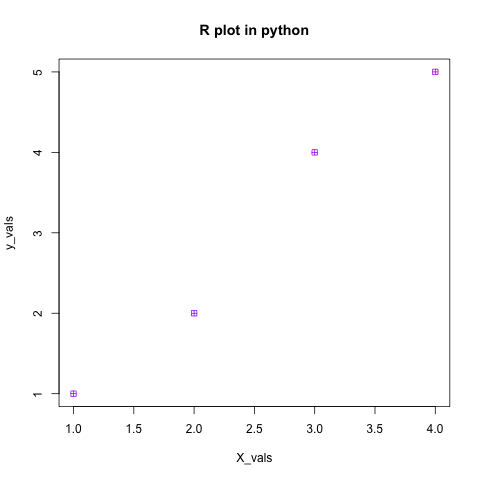

In [3]:
%%R
X_vals <- c(1,2,3,4)
y_vals <- c(1,2,4,5)

plot(X_vals, y_vals, col="purple", pch=12, main="R plot in python")

<a id='var'></a>
## 2. Variable passing ([to top](#var))

Once a notebook is designed to contain both Python and R cells it is possible to move computation results across the two interpreter using variable push/pull strategies.

<a id='i'></a>
### 2.A Push: from Python to R ([to top](#top))

Let us assume having a Pandas dataframe containing our data (stored in a variable named python_df)

In [4]:
import pandas as pd

python_df = pd.DataFrame({'A': [1, 2, 3, 4, 5, 6, 7],
                          'B': [7, 8, 7, 6, 5, 4, 1]},
                          ) 

python_df

,A,B
0,1,7
1,2,8
2,3,7
3,4,6
4,5,5
5,6,4
6,7,1


Mapping it to the R environment (where it will be stored as an R's dataframe) is called a "push" and can be achieved by useing the -i flag in the %%R magic

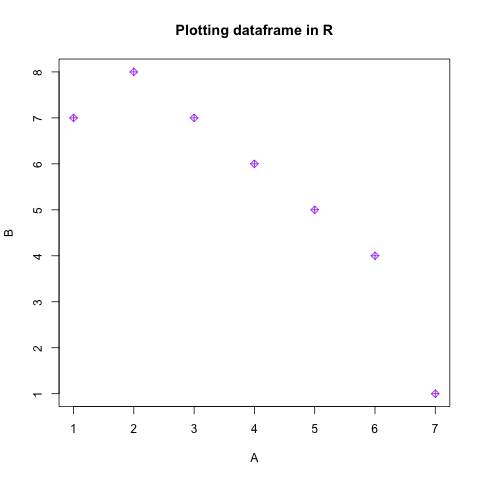

In [5]:
%%R -i python_df
# pass the dataframe to R using -i option

# Plot with R's plot function
plot(python_df, main="Plotting dataframe in R", col="purple", pch=9)

<a id='o'></a>
### 2.A Pull: from R to Python ([to top](#top))

Conversely, moving an "object" from R to Python is called a "Pull" and can be performed using the -o flag.

As an exameple consider the following code that creates a linear model using as input the dataframe previously defined in Python and pushed to the R environment.

The built model and computed coefficients are then pulled back to Python and stored in two variables named "model" and "coef"

In [6]:
%%R -o model -o coef
# python_df variable is still in R
# We can output the model object using the -o option

# Creating a linear model on the python DF using R's lm() function
model <- lm(B ~ A, data=python_df)
coef <- model$coefficients

Models and complex objects from the R environment are mapped either in Pandas DataFrame (if possible), or in dictionaries

In [7]:
# Show the model output as in R
print(model)
print(type(model))

o{'coefficients': [ 9.42857143 -1.        ], 'residuals': [-1.42857143  0.57142857  0.57142857  0.57142857  0.57142857  0.57142857
 -1.42857143], 'effects': [-14.36264997  -5.29150262   0.93689769   1.08581246   1.23472724
   1.38364201  -0.46744321], 'rank': [2], 'fitted.values': [8.42857143 7.42857143 6.42857143 5.42857143 4.42857143 3.42857143
 2.42857143], 'assign': [0 1], 'qr': o{'qr': [[ -2.64575131 -10.58300524]
 [  0.37796447   5.29150262]
 [  0.37796447   0.03347335]
 [  0.37796447  -0.15550888]
 [  0.37796447  -0.34449112]
 [  0.37796447  -0.53347335]
 [  0.37796447  -0.72245559]], 'qraux': [1.37796447 1.22245559], 'pivot': [1 2], 'tol': [1.e-07], 'rank': [2], }, 'df.residual': [5], 'xlevels': o{}, 'call': 
Call:
lm(formula = B ~ A, data = python_df)

Coefficients:
(Intercept)            A  
      9.429       -1.000  

, 'terms': B ~ A
attr(,"variables")
list(B, A)
attr(,"factors")
  A
B 0
A 1
attr(,"term.labels")
[1] "A"
attr(,"order")
[1] 1
attr(,"intercept")
[1] 1
attr(,"r

In [8]:
#model coefficients
print(coef)
print(type(coef))

[ 9.42857143 -1.        ]
<class 'numpy.ndarray'>


Indeed, also R's dataframes can be pulled to Python: in such case they will be automatically mapped in Pandas DataFrame objects.

In [9]:
%%R -o cars_df

library(datasets)
cars_df <- cars

In [10]:
cars_df

,speed,dist
1,4.0,2.0
2,4.0,10.0
3,7.0,4.0
4,7.0,22.0
5,8.0,16.0
6,9.0,10.0
7,10.0,18.0
8,10.0,26.0
9,10.0,34.0
10,11.0,17.0


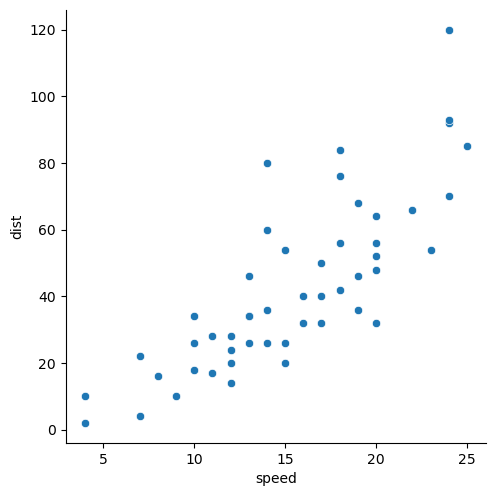

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(x_vars=['speed'], y_vars=['dist'], data=cars_df, height=5)
plt.show()